In [1]:
# learn more about grnndata in https://cantinilab.github.io/GRnnData/
from grnndata import GRNAnnData, from_anndata, read_h5ad, from_embeddings
from grnndata import utils 

import bengrn as ben

%load_ext autoreload
%autoreload 2

2024-01-16 16:04:44,062:INFO - Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-01-16 16:04:44,064:INFO - NumExpr defaulting to 8 threads.


💡 lamindb instance: jkobject/scprint


/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 14.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
# read a GRNAnndata file containing a GRN
grn = read_h5ad('grn.h5ad'))

/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


> /home/ml4ig1/Documents code/GRnnData/grnndata/utils.py(262)plot_cluster()
    259     import pdb
    260 
    261     pdb.set_trace()
--> 262     sc.tl.umap(subgrn, min_dist=0.5, spread=0.7)
    263     sc.pl.umap(subgrn, color=["louvain"])

*** KeyError: 'connectivities_key'
*** KeyError: 'params'
*** TypeError: string indices must be integers
*** KeyError: 'method'
*** KeyError: 'method'
         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


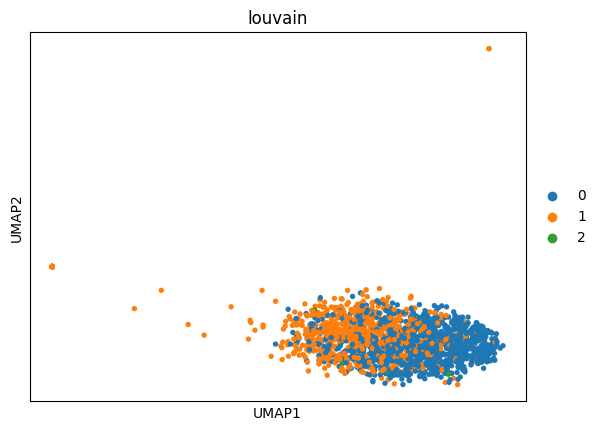

In [15]:
# One can plot a umap and clustering of the genes in the GRN based on their adjacencies
utils.plot_cluster(grn)

In [5]:
# some metrics are availale 
utils.metrics(grn)

{'is_connected': True, 'scale_freeness': 2517524445154.0}

In [19]:
# one can compute networks from sota tools like genie3
genie3_grn = ben.compute_genie3(grn.copy())
genie3_grn.write('genie3_grn.h5ad')

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 30 threads

K: sqrt
Number of trees: 100


running jobs on 30 threads
Elapsed time: 752.04 seconds


In [41]:
genie3_grn = read_h5ad('genie3_grn.h5ad')

/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [24]:
utils.metrics(genie3_grn)

{'is_connected': True, 'scale_freeness': 1048765629678.0}

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


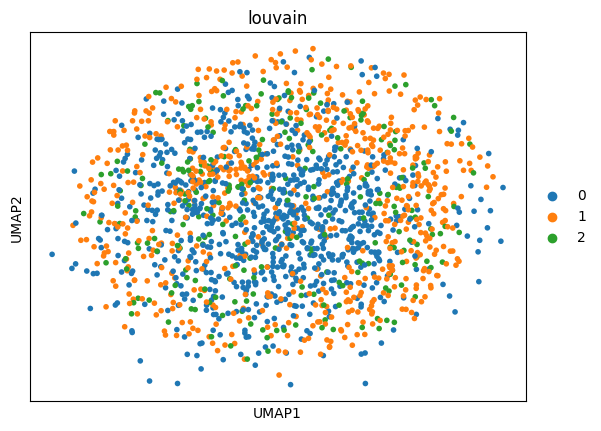

In [37]:
utils.plot_cluster(genie3_grn, stretch=5, min_dist=0.3, spread=1)

In [38]:
scenic_grn = ben.compute_scenic(grn.copy())
scenic_grn.write('scenic_grn.h5ad')

preparing dask client


2024-01-15 16:35:13,033:INFO - State start
2024-01-15 16:35:13,042:INFO -   Scheduler at:     tcp://127.0.0.1:40475
2024-01-15 16:35:13,043:INFO -   dashboard at:  http://127.0.0.1:8787/status
2024-01-15 16:35:13,045:INFO - Registering Worker plugin shuffle
2024-01-15 16:35:13,103:INFO -         Start Nanny at: 'tcp://127.0.0.1:36043'
2024-01-15 16:35:13,107:INFO -         Start Nanny at: 'tcp://127.0.0.1:32777'
2024-01-15 16:35:13,113:INFO -         Start Nanny at: 'tcp://127.0.0.1:46867'
2024-01-15 16:35:13,123:INFO -         Start Nanny at: 'tcp://127.0.0.1:39225'
2024-01-15 16:35:13,133:INFO -         Start Nanny at: 'tcp://127.0.0.1:40571'
2024-01-15 16:35:13,142:INFO -         Start Nanny at: 'tcp://127.0.0.1:45229'
2024-01-15 16:35:13,153:INFO -         Start Nanny at: 'tcp://127.0.0.1:36881'
2024-01-15 16:35:13,164:INFO -         Start Nanny at: 'tcp://127.0.0.1:38681'
2024-01-15 16:35:13,939:INFO - Register worker <WorkerState 'tcp://127.0.0.1:34213', name: 3, status: init, me

parsing input
creating dask graph
8 partitions
computing dask graph


/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 85.90 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 14.0.0. Please consider upgrading.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 14.0.0. Please consider upgrading.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 14.0.0. Please consider upgrading.
  warnin

shutting down client and local cluster


2024-01-15 16:44:50,449:INFO - Remove client Client-ad43eb2f-b3bb-11ee-944a-cc96e515ed95
2024-01-15 16:44:50,451:INFO - Received 'close-stream' from tcp://127.0.0.1:50052; closing.
2024-01-15 16:44:50,453:INFO - Remove client Client-ad43eb2f-b3bb-11ee-944a-cc96e515ed95
2024-01-15 16:44:50,456:INFO - Close client connection: Client-ad43eb2f-b3bb-11ee-944a-cc96e515ed95
2024-01-15 16:44:50,461:INFO - Closing Nanny at 'tcp://127.0.0.1:36043'. Reason: nanny-close
2024-01-15 16:44:50,463:INFO - Nanny asking worker to close. Reason: nanny-close
2024-01-15 16:44:50,464:INFO - Closing Nanny at 'tcp://127.0.0.1:32777'. Reason: nanny-close
2024-01-15 16:44:50,467:INFO - Nanny asking worker to close. Reason: nanny-close
2024-01-15 16:44:50,468:INFO - Closing Nanny at 'tcp://127.0.0.1:46867'. Reason: nanny-close
2024-01-15 16:44:50,470:INFO - Nanny asking worker to close. Reason: nanny-close
2024-01-15 16:44:50,472:INFO - Closing Nanny at 'tcp://127.0.0.1:39225'. Reason: nanny-close
2024-01-15 16:4

finished



2024-01-15 16:44:51,376 - pyscenic.utils - INFO - Calculating Pearson correlations.
2024-01-15 16:44:51,376:INFO - Calculating Pearson correlations.

2024-01-15 16:44:51,408 - pyscenic.utils - WARNING - Note on correlation calculation: the default behaviour for calculating the correlations has changed after pySCENIC verion 0.9.16. Previously, the default was to calculate the correlation between a TF and target gene using only cells with non-zero expression values (mask_dropouts=True). The current default is now to use all cells to match the behavior of the R verision of SCENIC. The original settings can be retained by setting 'rho_mask_dropouts=True' in the modules_from_adjacencies function, or '--mask_dropouts' from the CLI.
	Dropout masking is currently set to [False].
2024-01-15 16:44:51,408:WARNING - Note on correlation calculation: the default behaviour for calculating the correlations has changed after pySCENIC verion 0.9.16. Previously, the default was to calculate the correlat

Create regulons from a dataframe of enriched features.
Additional columns saved: []

Additional columns saved: []


In [44]:
scenic_grn = read_h5ad('scenic_grn.h5ad')

/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [49]:
(scenic_grn.varp['GRN']!=0).sum(), (scenic_grn.varp['modules']!=0).sum()

(1149, 24375)

In [50]:
scenic_grn.varp['GRN'] = scenic_grn.varp['modules']

In [51]:
utils.metrics(scenic_grn)

{'is_connected': False, 'scale_freeness': 334990247.0}

  (0, 80)	1
  (0, 262)	1
  (0, 545)	1
  (0, 561)	1
  (0, 618)	1
  (0, 1374)	1
  (1, 94)	1
  (1, 176)	1
  (1, 527)	1
  (1, 590)	1
  (1, 642)	1
  (1, 973)	1
  (1, 1002)	1
  (1, 1047)	1
  (1, 1372)	1
  (1, 1392)	1
  (1, 1403)	1
  (1, 1498)	1
  (1, 1615)	1
  (1, 1743)	1
  (1, 1826)	1
  (1, 1988)	1
  (3, 94)	1
  (3, 395)	1
  (3, 642)	1
  :	:
  (1990, 907)	1
  (1990, 1002)	1
  (1992, 80)	1
  (1992, 361)	1
  (1992, 404)	1
  (1992, 527)	1
  (1992, 546)	1
  (1992, 590)	1
  (1992, 746)	1
  (1992, 826)	1
  (1992, 869)	1
  (1992, 1002)	1
  (1992, 1038)	1
  (1992, 1051)	1
  (1992, 1215)	1
  (1992, 1347)	1
  (1992, 1536)	1
  (1992, 1544)	1
  (1992, 1553)	1
  (1994, 94)	1
  (1994, 1615)	1
  (1996, 1372)	1
  (1996, 1403)	1
  (1998, 642)	1
  (1998, 1047)	1
         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


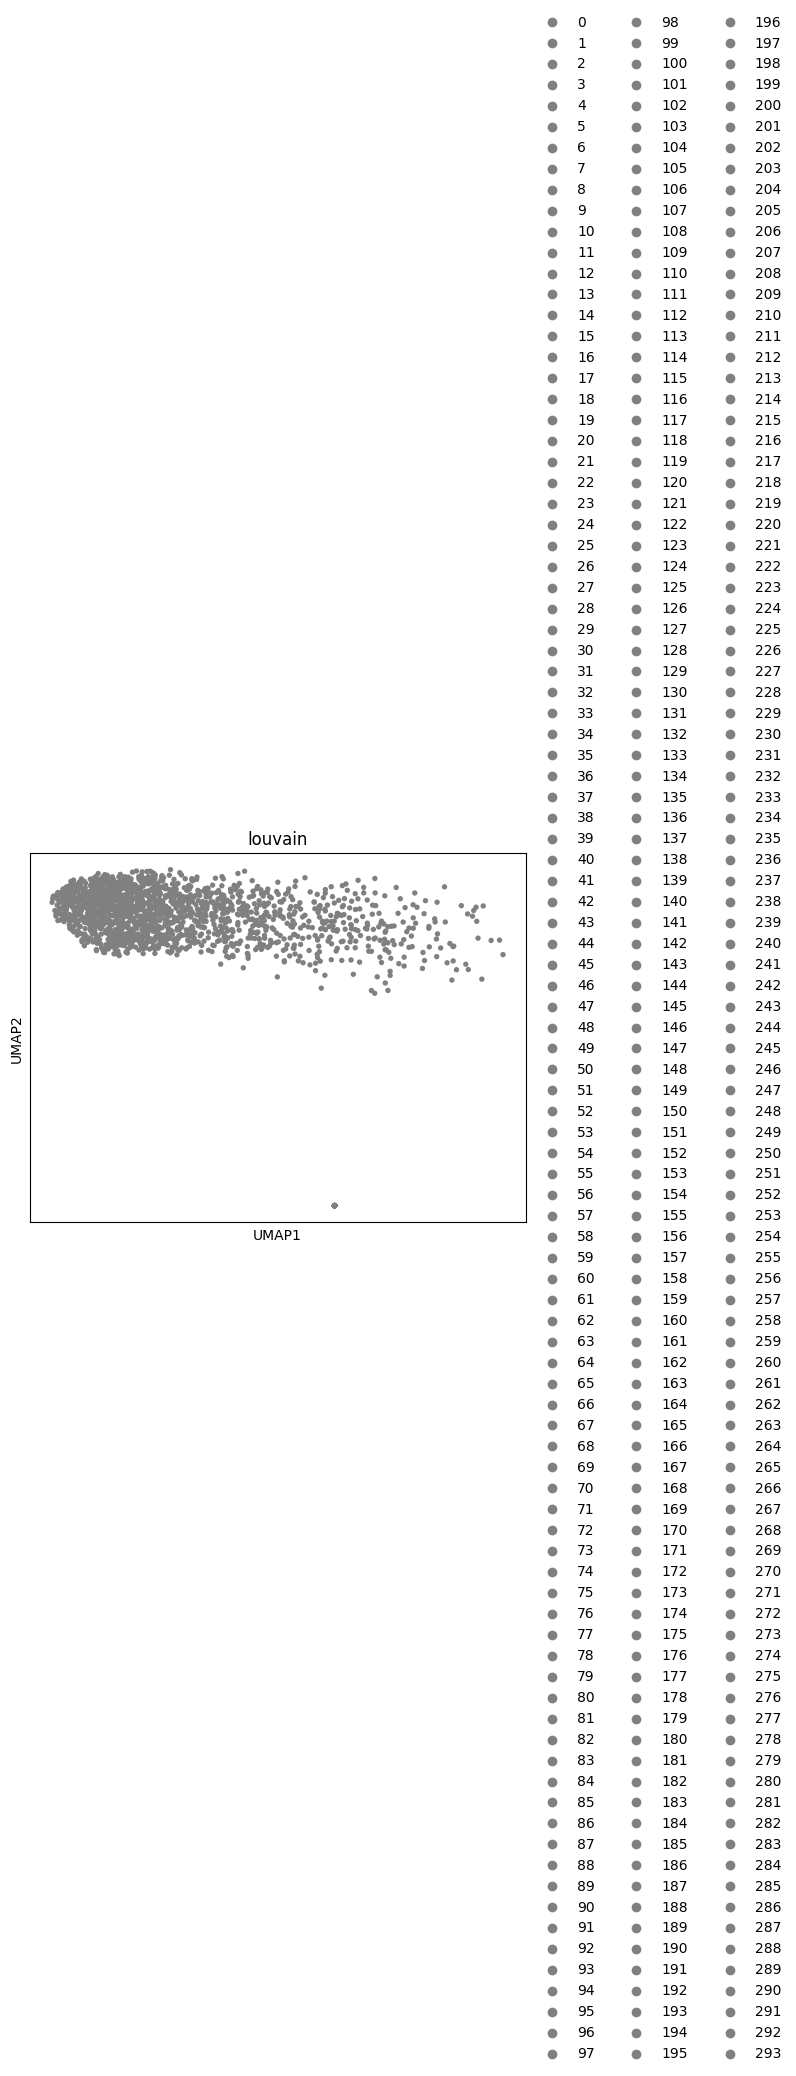

In [52]:
utils.plot_cluster(scenic_grn, stretch=5, min_dist=0.3, spread=1)

## comparisons of networks

intersection of 999 genes


/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


{'intersection': 0.4995,
 'precision': 0.0012519221864620907,
 'recall': 0.24455611390284757,
 'accuracy': 0.0012470993550958815,
 'spearman_corr': SignificanceResult(statistic=nan, pvalue=nan),
 'auc': 0.0015137274580689386}

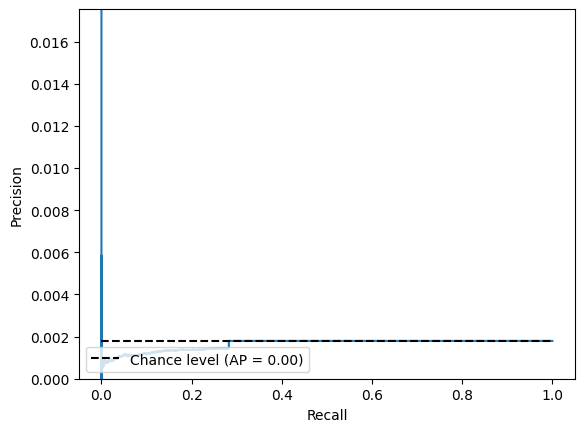

In [42]:
ben.BenGRN(grn).do_tests()

intersection of 909 genes


/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


{'intersection': 0.49917627677100496,
 'precision': 0.0015702927999918822,
 'recall': 0.4501818181818182,
 'accuracy': 0.001567286998354222,
 'spearman_corr': SignificanceResult(statistic=nan, pvalue=nan),
 'auc': 0.0018993308669924172}

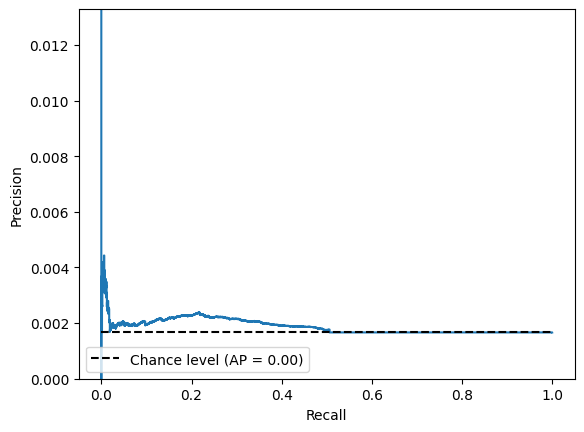

In [43]:
ben.BenGRN(genie3_grn).do_tests()

GRnnData object with n_obs × n_vars = 12239 × 2000
    obs: 'n_genes', 'n_counts', 'percent_mito', 'donor_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'author_cell_type', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch_id'
    var: 'chromosome', 'featureend', 'featurestart', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features', 'mean', 'var', 'hvf_loess', 'hvf_rank', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'id_in_vocab', 'gene_ids', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'centrality', 'TFs'
    uns: 'cell_type_ontology_term_id_colors', 'default_embedding', '

intersection of 999 genes


/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


{'intersection': 0.4995,
 'precision': 0.06628242074927954,
 'recall': 0.02568397543271915,
 'accuracy': 0.01886018860188602,
 'spearman_corr': SignificanceResult(statistic=nan, pvalue=nan),
 'auc': 0.036774439705202534}

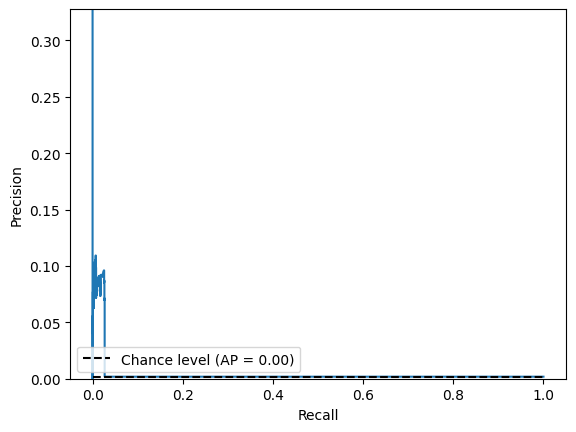

In [46]:
ben.BenGRN(scenic_grn).do_tests()

In [49]:
scenic_grn.varp['GRN'] = scenic_grn.varp['modules']

intersection of 999 genes


/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


{'intersection': 0.4995,
 'precision': 0.021042713567839197,
 'recall': 0.14963707426018985,
 'accuracy': 0.018795146924749283,
 'spearman_corr': SignificanceResult(statistic=nan, pvalue=nan),
 'auc': 0.015585514348266173}

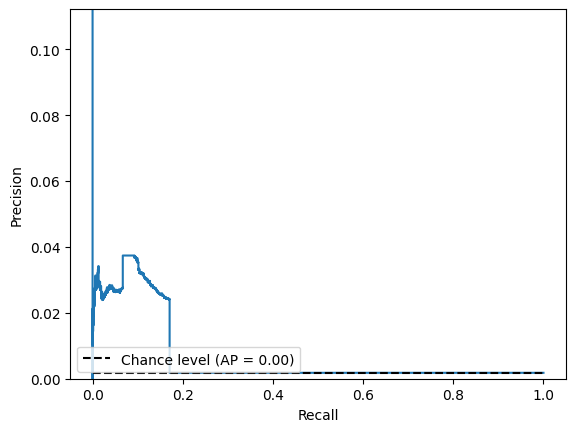

In [50]:
ben.BenGRN(scenic_grn).do_tests()

## scGPT (gene embeddings)

In [2]:
adata = sc.read('../save/scGPT_embeddings.h5ad')

/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [4]:
scgpt_emb = from_embeddings(adata.T)

intersection of 6885 genes


/home/ml4ig1/miniconda3/envs/training-gpt/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


{'intersection': 0.11343229484159019,
 'precision': 0.027964380565536635,
 'recall': 0.011714659685863875,
 'accuracy': 0.008324806994698168,
 'spearman_corr': SignificanceResult(statistic=nan, pvalue=nan),
 'auc': 0.016193328964454867}

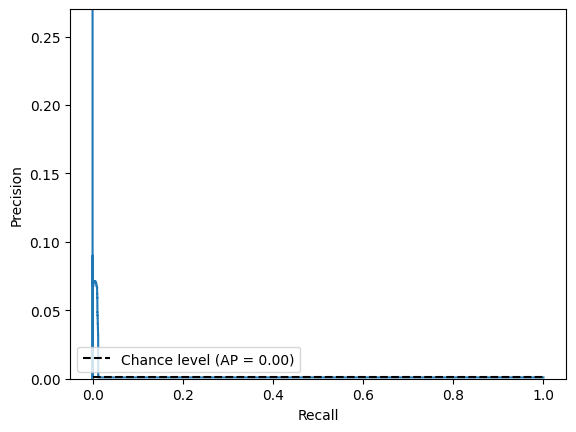

In [6]:
ben.BenGRN(scgpt_emb).do_tests()